Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

# Importing Required Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Read Dataset File

In [2]:
df = pd.read_csv("E:/Datatrained/DataSets for Projects/DSData-master/DSData-master/happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#Checking shape of the dataset
df.shape

(158, 12)

In [5]:
#Checking columns in datasets
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
#Renaming the columns name to avoid space in-between
df.rename(columns={'Happiness Rank': 'Happiness_Rank'}, inplace=True)
df.rename(columns={'Happiness Score': 'Happiness_Score'}, inplace=True)
df.rename(columns={'Standard Error': 'Standard_Error'}, inplace=True)
df.rename(columns={'Economy (GDP per Capita)': 'Economy(GDP_per_Capita)'}, inplace=True)
df.rename(columns={'Trust (Government Corruption)': 'Government_Corruption'}, inplace=True)
df.rename(columns={'Dystopia Residual': 'Dystopia_Residual'}, inplace=True)
df.rename(columns={'Health (Life Expectancy)': 'Life_Expectancy'}, inplace=True)

In [7]:
#Describing dataset to understand the distribution of datasets
df.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
#To check the null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  158 non-null    object 
 1   Region                   158 non-null    object 
 2   Happiness_Rank           158 non-null    int64  
 3   Happiness_Score          158 non-null    float64
 4   Standard_Error           158 non-null    float64
 5   Economy(GDP_per_Capita)  158 non-null    float64
 6   Family                   158 non-null    float64
 7   Life_Expectancy          158 non-null    float64
 8   Freedom                  158 non-null    float64
 9   Government_Corruption    158 non-null    float64
 10  Generosity               158 non-null    float64
 11  Dystopia_Residual        158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


We have observed no null values and two features are object type which need to be drop out since those are categorical and giving no weighted into datasets

# Removing Categorical columns which will not have any impact in the datasets

In [9]:
df_new = df.drop(["Country","Region"], axis=1)
df_new.head(2)

,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


# Data Distribution and skewness checking

C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

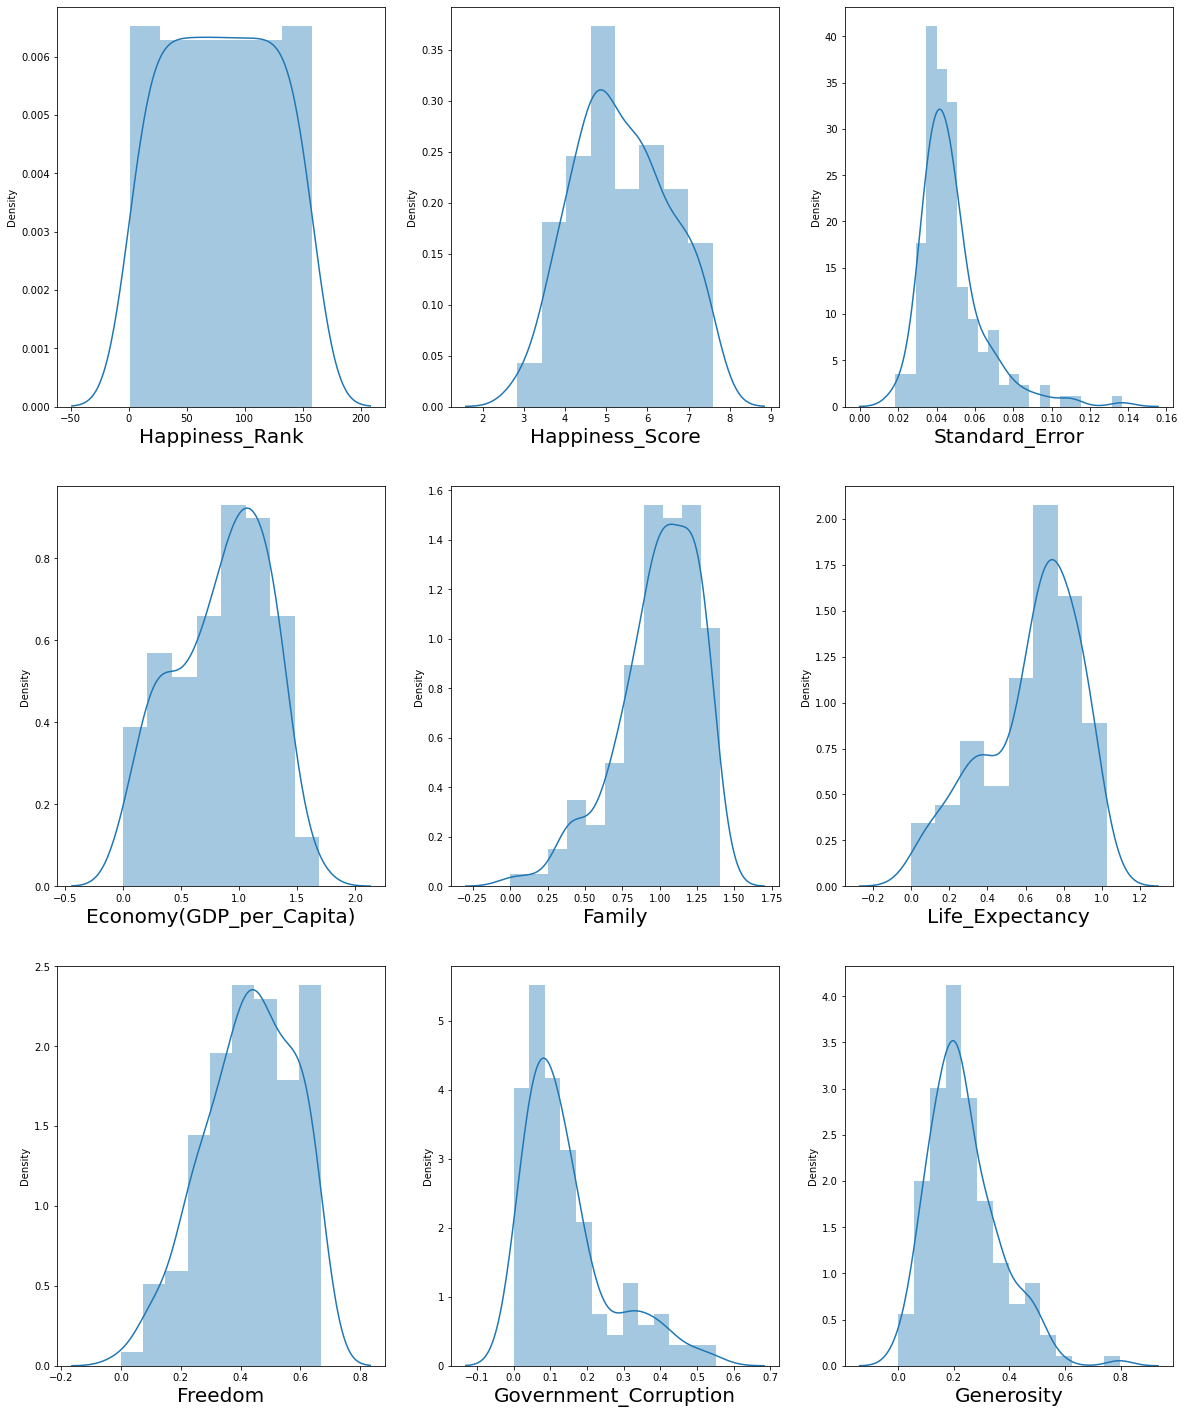

In [10]:
# lets see how data are distributed in every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=9 : #As the number of columns are 10 in datasets
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

Based on above graph i have found few features are skewed like Standard Error, Government Corruption, Geneosity and Family.

In [11]:
#devide the data into feature and labels
y = df_new['Happiness_Score']
x = df_new.drop(columns = ['Happiness_Score'])

# Data Visualization to see the Correlation

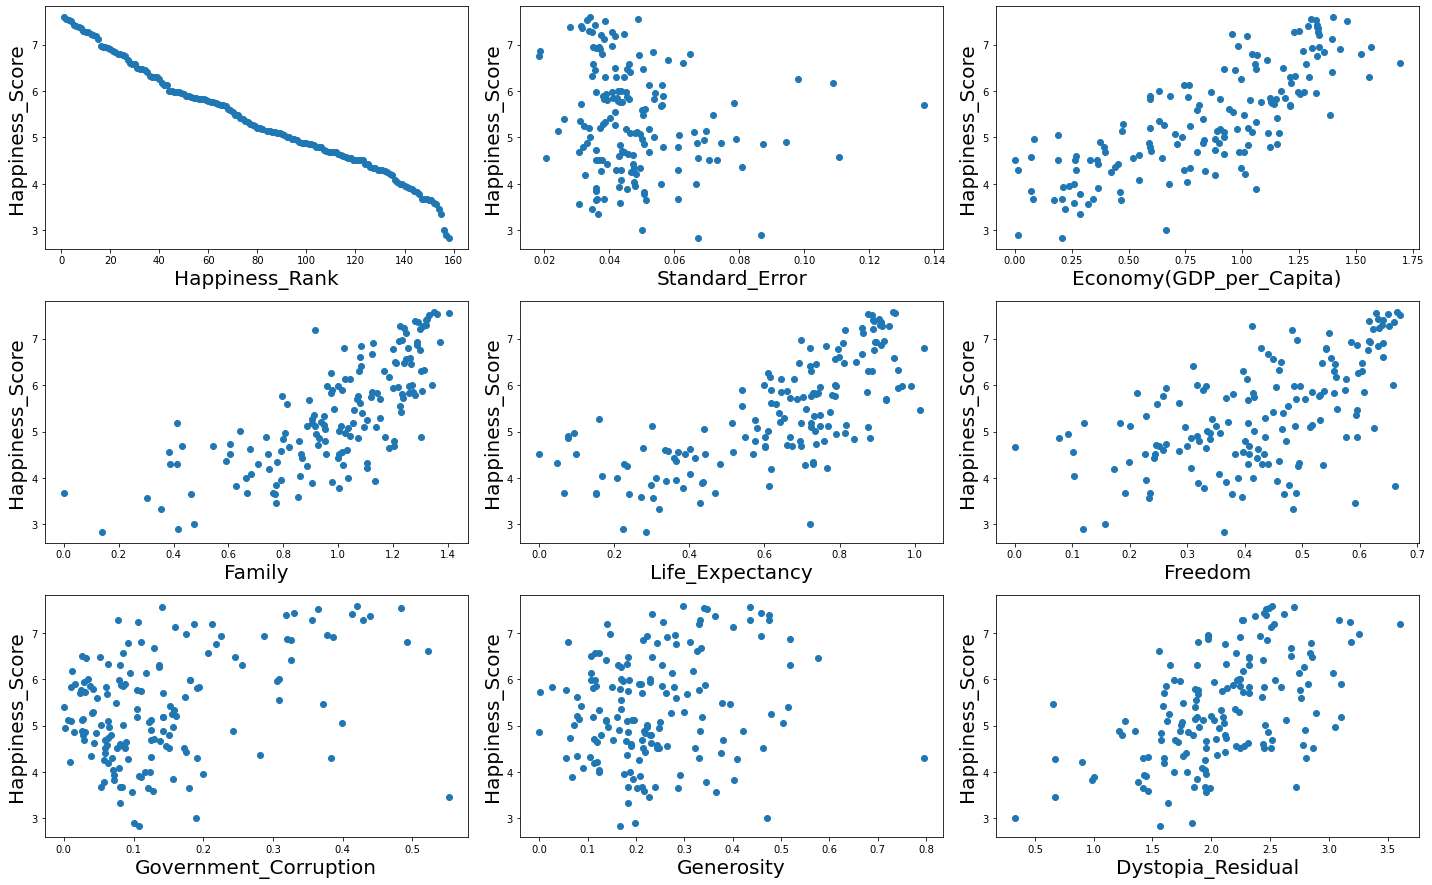

In [12]:
#lets visualize the graph to see the correlations

plt.figure(figsize = (20,20), facecolor='white')
plotnumber = 1
for column in x:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Happiness_Score', fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

Based on above graph, i have observed that Happiness Rank and Happiness Score highly negatively correlated, Economy, Family, Life Expentancy, Freedom, Government Corruption & Dytopia Residual are Linearly correlated, Standard Error & Generosity shows less correlations.

df_new.corr()

<AxesSubplot:>

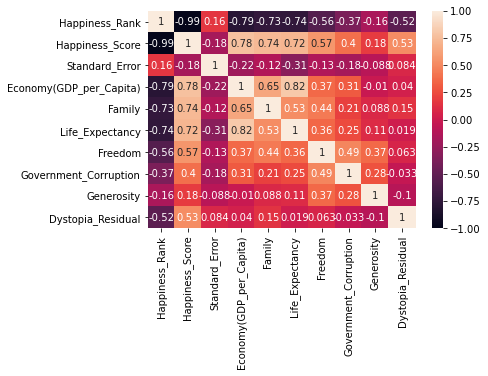

In [13]:
#Heatmap visualization
sns.heatmap(df_new.corr(), vmin=-1.00, vmax=1.00, annot=True)

Observation from heatmap graph, Happiness Score is highly -ve correlated with Happiness Rank with -0.99%, Happiness highly +ve correlated with Economy, Family, Life Expectancy and Dystopia Residual, Happiness Score are very less correlation shows with Standard Error & Generosity. 

# Checking Outliers

C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Amit Singh\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnin

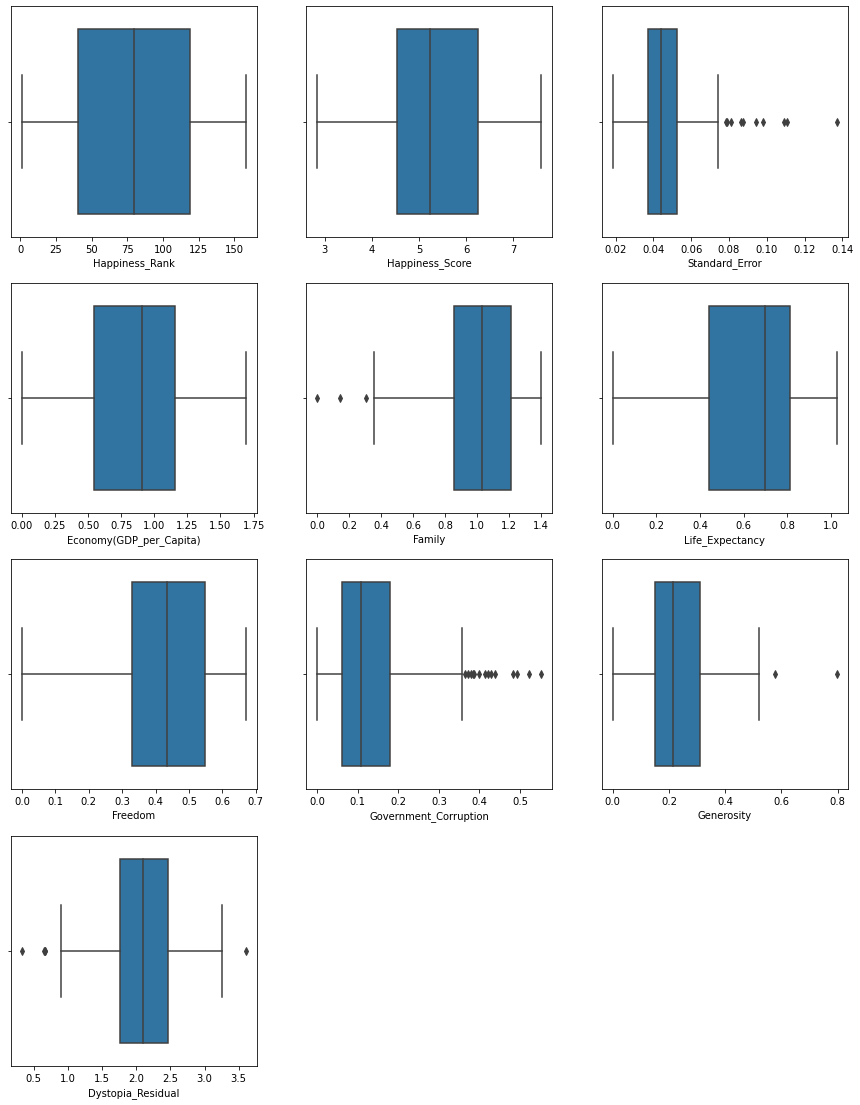

In [14]:
#Visualize the outliers in the dataset by using boxplot

plt.figure(figsize=(15,50))
graph = 1

for column in df_new:
    if graph<=30 : 
        ax = plt.subplot(10,3, graph)
        sns.boxplot(df_new[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph +=1
plt.show()

# Outlier Detection

In [15]:
#Find the IQR to identify the outliers

#1st quantile
q1 = df_new.quantile(0.25)
#3rd quantile
q3 = df_new.quantile(0.75)
#IQR
IQR = q3-q1

In [16]:
#Validating one outlier
Generosity_high = (q3.Generosity + (1.5 * IQR.Generosity))
print(Generosity_high)
index = np.where(df_new['Generosity']>Generosity_high)
data = df_new.drop(df_new.index[index])
print(data.shape)
data.reset_index()

0.5488775
(156, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
151,153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [17]:
#Validating one outlier
StandardError_high = (q3.Standard_Error + (1.5 * IQR.Standard_Error))
print(StandardError_high)
index = np.where(df_new['Standard_Error']>StandardError_high)
data = df_new.drop(df_new.index[index])
print(data.shape)
data.reset_index()

0.07484874999999999
(148, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
143,152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
144,153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
145,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
146,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [18]:
#Validating one outlier
Trust_high = (q3.Government_Corruption + (1.5 * IQR.Government_Corruption))
print(Trust_high)
index = np.where(df_new['Government_Corruption']>Trust_high)
data = df_new.drop(df_new.index[index])
print(data.shape)
data.reset_index()

0.35812499999999997
(144, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
139,152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
140,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
141,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
142,156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
#Validating one outlier
Family_low = (q3.Family - (1.5 * IQR.Family))
print(Family_low)
index = np.where(df_new['Family']<Family_low)
data = df_new.drop(df_new.index[index])
print(data.shape)
data.reset_index()

0.6780312500000001
(138, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
133,145,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
134,148,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
135,150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
136,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


# Dividing data in feature and vectors

In [20]:
x = data.drop(["Happiness_Score"], axis=1)
y = data["Happiness_Score"]

In [21]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-1.64594629, -0.81207322,  1.28859477, ...,  2.19959977,
         0.46726625,  0.74477984],
       [-1.62274264,  0.05171494,  1.04145773, ..., -0.03987431,
         1.557273  ,  1.08744241],
       [-1.59953898, -0.8607456 ,  1.10222526, ...,  2.71286119,
         0.81578403,  0.69775027],
       ...,
       [ 1.8346021 ,  0.20242339, -1.15462207, ...,  0.2640273 ,
        -0.27594147, -1.29703475],
       [ 1.85780576, -0.27667703, -1.69832879, ..., -0.14551975,
        -0.15234696, -1.20848776],
       [ 1.90421307, -0.78099326, -1.79289105, ...,  3.26273242,
        -0.08351841, -2.6830708 ]])

# This is how data looks after scaling. Now we will check for multicollinearity using VIF(Variance Inflation Factor)

In [22]:
x_scaled.shape[1]

9

# Checking Multicollinearity Using Variance Inflation Factor

Finding Variance Inflation Factor in each scaled column i.e X_scaled.shape[1](1/1-R2))

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
#lets check the values
vif

,vif,Features
0,87.803592,Happiness_Rank
1,1.200924,Standard_Error
2,14.015969,Economy(GDP_per_Capita)
3,4.574120,Family
4,9.007107,Life_Expectancy
5,4.355906,Freedom
6,2.225915,Government_Corruption
7,2.051114,Generosity
8,22.669722,Dystopia_Residual


Observed VIF values are greater than value 5 for feature Happiness_Rank, Economy, Dystopia_Residual and Life_Expectancy, other than these feature are less than value 5, Which means that we have multicollinearity in the datasets. The multicollinearity issues will be handled by Lasso method in regression 

In [24]:
#Split data in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=323)

In [25]:
X_train

array([[ 1.40735218e-01, -3.54083707e-01, -6.58694992e-01,
        -9.08485487e-01, -2.05299519e+00, -6.41056997e-01,
        -8.53738441e-01,  2.76249445e-01,  1.44226141e+00],
       [-1.50672436e+00, -1.17095872e+00,  1.11261557e+00,
         1.17015906e+00,  9.77396280e-01,  1.18356011e+00,
         1.38179305e+00,  1.86821242e+00,  6.48864760e-01],
       [-7.17800053e-01,  3.57665083e+00,  8.04028807e-01,
         6.35745271e-01, -1.72322093e-01,  8.02320822e-01,
        -1.08627105e+00,  6.36486049e-01,  2.83466898e-01],
       [ 1.18489974e+00,  1.33244360e+00, -1.50909933e+00,
        -6.24272255e-01, -2.71496929e+00, -2.05297550e-01,
        -4.71065401e-01, -1.72581457e-01,  7.31250025e-01],
       [-1.84115966e-01, -9.73923541e-01,  6.09368050e-01,
         9.26816343e-01,  5.27747422e-02, -4.83993379e-01,
        -9.36211079e-01, -1.83579487e+00,  2.92969321e-01],
       [ 1.06888146e+00,  1.14009973e+00, -1.00839692e+00,
        -3.01677240e-01, -1.18986896e+00, -2.265476

In [26]:
y_train

77     5.268
6      7.378
40     6.168
122    4.507
63     5.716
       ...  
8      7.286
58     5.813
51     5.889
44     5.995
48     5.960
Name: Happiness_Score, Length: 103, dtype: float64

# Model Instantiating and training

Since Target/Labelled data shows continous Variable so the dataset belongs to a Regression model

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

# Predict the Happiness score from testing dataset

In [28]:
df.tail(2)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy(GDP_per_Capita),Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [29]:
print('Happiness Score :', regression.predict(scalar.transform([[158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726]])))

Happiness Score : [2.83885758]


# Save the model and later you can use it for prediction

In [30]:
#Saving the model to the local file system
import pickle
filename = 'World Happiness Score.pickle'
pickle.dump(regression, open(filename, 'wb'))


Saved regression model as name of World Happiness Score.pickle

In [31]:
#Prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict(scalar.transform([[157, 0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302]]))
a

array([2.90468618])

As i see from above results, after training the train data it is giving a perfect prediction after trying with one of the data from test distribution.

In [32]:
#Adjusted R2
regression.score(X_train,y_train)

0.9999999410846231

Observation : Over Model is predicting 99.99% while training the train datasets which is pretty good prediction.

In [33]:
y_pred = regression.predict(X_test)

In [34]:
y_pred

array([4.57148404, 6.57409271, 7.40601417, 5.68860931, 4.63331176,
       4.25192025, 4.79959687, 7.28398846, 7.36360955, 4.51716728,
       4.34985729, 6.94615247, 4.8390733 , 6.94027939, 4.64231358,
       4.95926031, 5.60467341, 4.87434382, 4.60978518, 5.70894485,
       5.19234076, 5.33247077, 3.46495099, 4.27059666, 5.28649365,
       6.78622092, 5.12313396, 4.78640278, 5.88976623, 6.90126248,
       5.75845255, 4.86722121, 6.45473931, 5.19232554, 5.05741642])

All the predictions using test datasets which shows almost similar data.

# Plot to Visualize Actual data Vs Predicted data

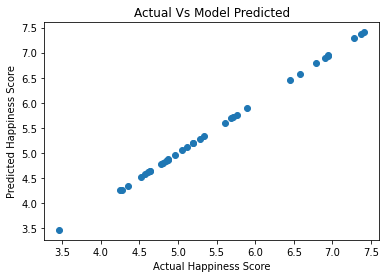

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Vs Model Predicted')
plt.show()

Observation : Actual Vs Model Prediction shows pretty good correlation and giving a perfect linear graph correlation.

# Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
y_pred = regression.predict(X_test)

In [38]:
mean_absolute_error(y_test,y_pred)

0.00026544065205024326

MAE results show very less error in the model which is good sign for our model.

In [39]:
mean_squared_error(y_test,y_pred)

9.155993829394322e-08

MSE results show very less error in the model which is good sign for our model.

In [40]:
np.sqrt(mean_absolute_error(y_test,y_pred))

0.01629234949447879

SMAE results show very less error in the model which is good sign for our model.

# Regularisation

In [41]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

# Lasso Regularization

In [42]:
#LassoCV will return the best alpha(Learning rate or Labmda) after max iteration
#Normalize is substracting the mean and deviding by the L2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(normalize=True)

In [43]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.00010518408412823715

In [44]:
#Now that we have parameter, lets use lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.00010518408412823715)

In [45]:
lasso_reg.score(X_test, y_test)

0.9999989665900163

Observation: Lasso Regularization also give a similar results above 99% which is pretty good sign for our model. 

# Using Ridge Regularization

In [46]:
#RidgeCV will return best alpha and coefficient after performing 10 cross validation
ridgecv = Ridge(alpha = np.arange(0.001,0.1,0.01), normalize=True)
ridgecv.fit(X_train, y_train)

ValueError: Number of targets and number of penalties do not correspond: 10 != 1

In [47]:
ridgecv.alpha_

AttributeError: 'Ridge' object has no attribute 'alpha_'

In [48]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

AttributeError: 'Ridge' object has no attribute 'alpha_'

In [49]:
ridge_model.score(X_test, y_test)

NameError: name 'ridge_model' is not defined

# Model Observation :

    1. Imported all the required liberaties
    2. Loaded the CSV file
    3. Data Describes
    4. In the dataset, we do not observe any missing data
    5. Few variables were skewed
    6. Boxplot observation shows outliers in the datasets
    7. Observed Outliers in the dataset which was removed using Upper Limit & Lower Limit method of IQR which is called as statistical distribution method.
    8. Heatmap shows the correlation of each variables
    9. Scaling was performed
    10.VIF applied to check Multicollinearity
    11.Target variable was continous values so i have used regression model  
    12.Split Data into Train and Testing
    13. Trained our model using train dataset
    14. Predicted the results which shows very good result with 99.99%
    15. Evaluation done using regression metrics like MAE, MSE & MSAE
    16. Lasso Regression tested which has given similar results.
    17. Actual Vs Model Predicted plots shows perfectly fit model.
    18. Support needed on ridge method where i am getting some error. Need technical support to fix the issues
    